In [38]:
import pandas as pd
from janitor import clean_names
import numpy as np
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
pt = PowerTransformer(standardize=True)

In [19]:
df = pd.read_excel('practica2.xlsx')
df = (clean_names(df)
      .dropna(subset = 'valoracion_global'))
df = df.replace(['No uso','no',' ','1o'],np.NaN)
df = df.reset_index(drop=True)
df['id']=df.reset_index().index
df

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,<5_causa,valoracion_global,id
0,8.0,8.0,8.0,8.0,9,8.0,8.0,7.0,8.0,8.0,NaN,9.0,0
1,NaN,10.0,9.0,10.0,10,NaN,8.0,NaN,9.0,9.0,NaN,9.0,1
2,8.0,10.0,7.0,7.0,10,7.0,8.0,8.0,8.0,8.0,NaN,7.0,2
3,9.0,8.0,8.0,9.0,10,10.0,5.0,5.0,7.0,10.0,NaN,9.0,3
4,8.0,9.0,8.0,9.0,9,9.0,NaN,NaN,9.0,9.0,NaN,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,10.0,9.0,10.0,10.0,8,10.0,7.0,NaN,10.0,10.0,NaN,8.0,1092
1093,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,9.0,9.0,Calefacción alta y refrigeración pobre en varano,7.0,1093
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1094
1095,6.0,5.0,8.0,8.0,6,7.0,6.0,3.0,NaN,0.0,La BPM Vicálvaro necesita una reforma de calad...,5.0,1095


In [20]:
dfnum = df.drop(['<5_causa'],axis = 1).astype('float')
dfnum[dfnum.columns] = SimpleImputer(strategy='median').fit_transform(dfnum[dfnum.columns])
dfnum[dfnum.columns.difference(['id'])] = pd.DataFrame(pt.fit_transform(dfnum[dfnum.columns.difference(['id'])]),columns=dfnum.columns.difference(['id']))
dfnum

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,valoracion_global,id
0,0.037279,-0.072756,-0.397804,-0.586679,-0.640905,-0.666652,-0.201810,-0.654844,-0.217617,-0.836139,0.305718,0.0
1,0.037279,1.517583,0.331286,1.224834,0.756325,0.145962,-0.201810,0.090402,0.376508,-0.064324,0.305718,1.0
2,0.037279,1.517583,-0.968633,-1.184006,0.756325,-1.257874,-0.201810,0.090402,-0.217617,-0.836139,-1.234480,2.0
3,0.793687,-0.072756,-0.397804,0.204909,0.756325,1.227960,-1.469851,-1.690133,-0.743607,0.996407,0.305718,3.0
4,0.037279,0.664564,-0.397804,0.204909,-0.640905,0.145962,0.418993,0.090402,0.376508,-0.064324,0.305718,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.659053,0.664564,1.240011,1.224834,-1.419108,1.227960,-0.718332,0.090402,1.039456,0.996407,-0.566936,1092.0
1093,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,-0.718332,0.090402,0.376508,-0.064324,-1.234480,1093.0
1094,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,0.418993,0.090402,0.376508,-0.064324,-0.566936,1094.0
1095,-1.164536,-1.646728,-0.397804,-0.586679,-2.021212,-1.257874,-1.138317,-2.239119,0.376508,-2.229662,-2.078283,1095.0


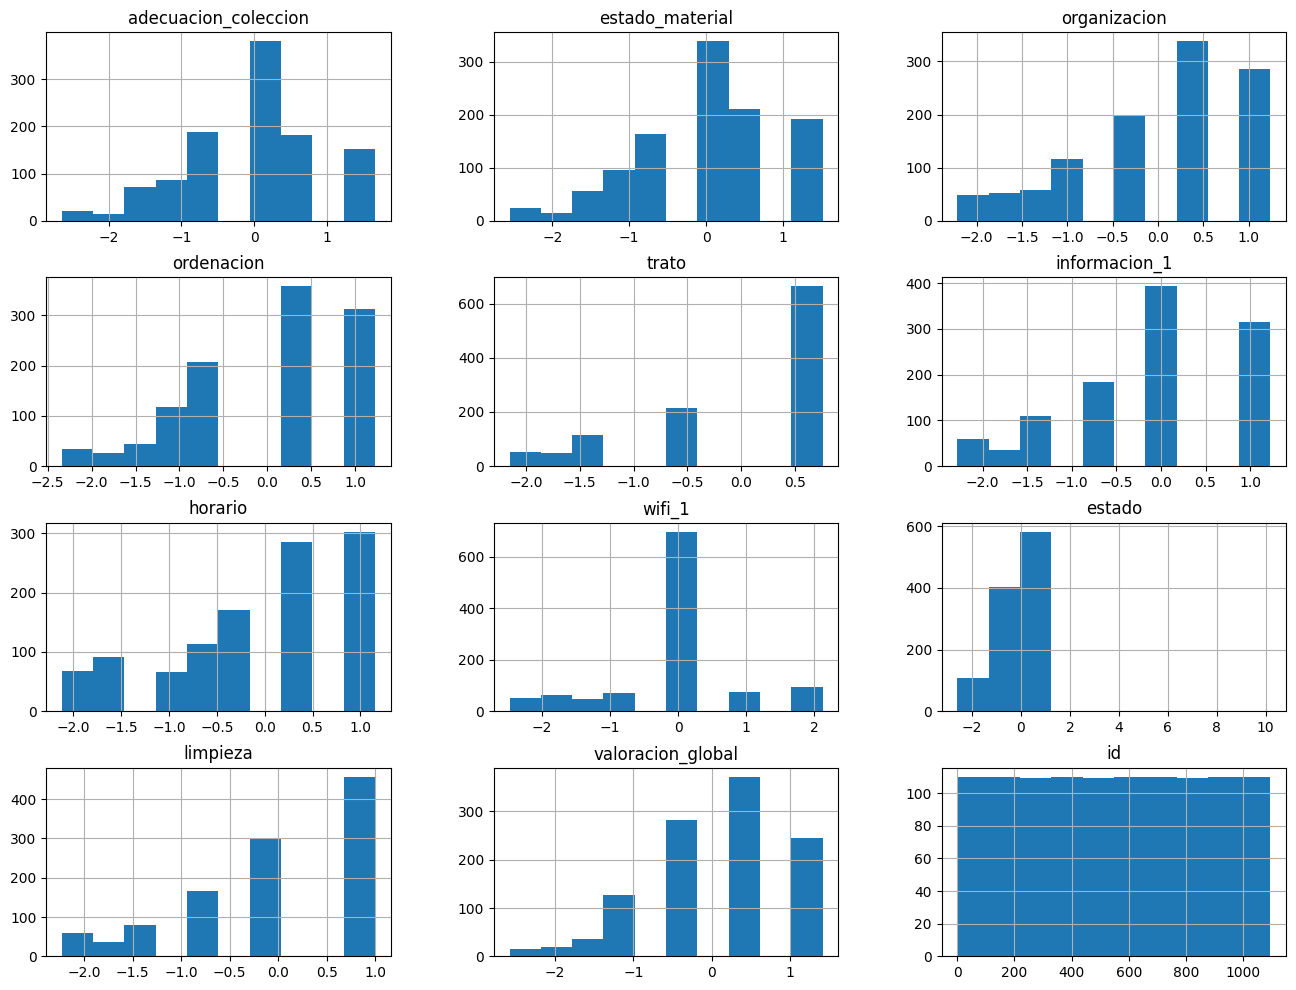

In [21]:
plots = dfnum.hist(figsize = (16,12))

In [22]:
dfCat = df[['<5_causa']].astype('string')
dfCat['id'] = df['id']
dfCat = dfCat.dropna()
dfCat

,<5_causa,id
5,Hace mucho calor en la sala de lectura y entra...,5
7,Unos días hace mucho frio y no se puede estar ...,7
8,Cuando ponen la calefación hace mucho calor y ...,8
10,"Hace demasiado calor en invierno y verano, imp...",10
16,Temperatura en la sala de estudio excesivament...,16
...,...,...
1081,Ahora no está puesto el aire (en verano).,1081
1084,Me gustaría que el horario de tarde se amplias...,1084
1085,Más refrigeración en algunos días calurosos.,1085
1093,Calefacción alta y refrigeración pobre en varano,1093


In [23]:
vectorizer = TfidfVectorizer(
      lowercase=True,
      stop_words=stopwords.words("spanish"),
      ngram_range=(2, 2))
vectorizer

TfidfVectorizer(ngram_range=(2, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [24]:
vectorizer.fit(dfCat['<5_causa'])
X = vectorizer.transform(dfCat['<5_causa'])

In [25]:
tfidf = pd.DataFrame(data = X.toarray(),
                     columns=vectorizer.get_feature_names_out(),
                     index=dfCat['id'])

tfidf


,10 debido,10 experiencia,19 hace,2007 cáceres,27 28,28 dificulta,2ª planta,30 días,abiertas funciona,abiertas pesar,...,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,ángel bibliotecarios,época refrigeración
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
saved = pd.DataFrame(tfidf.sum(axis=0),columns=['sum']).sort_values(by = 'sum',ascending=False)
cs = saved['sum'].cumsum()
csplot = cs.loc[cs < saved['sum'].sum()*0.80]
final_words = list(csplot.index)
final_words.append('id')
final_words

['hace calor',
 'calor verano',
 'hace frio',
 'demasiado calor',
 'nunca funciona',
 'calor invierno',
 'sala lectura',
 'calor frío',
 'aire acondicionado',
 'sala estudio',
 'frio invierno',
 'frio calor',
 'invierno calor',
 'podría mejorar',
 'hace demasiado',
 'funciona climatización',
 'funciona aire',
 'calor siempre',
 'funciona bien',
 'mala iluminación',
 'invierno hace',
 'frío invierno',
 'acondicionado hace',
 'wifi falla',
 'falta luz',
 'préstamo intercentros',
 'invierno verano',
 'sistema funciona',
 'utilizo internet',
 'climatización deficiente',
 'funciona calefacción',
 'biblioteca refrescada',
 'falla wifi',
 'vino pandemia',
 'luz pésima',
 'ventilación natural',
 'sistema refrigeración',
 'servicio autopréstamo',
 'varias veces',
 'frío verano',
 'hace muchísimo',
 'muchísimo calor',
 'funciona peor',
 'falta iluminación',
 'poca luz',
 'calor enseguida',
 'hace frío',
 'calefacción alta',
 'abrigo puesto',
 'abrir ventanas',
 'calor ocasiones',
 'verano tardes

In [27]:
tfidf = tfidf[tfidf.columns.intersection(final_words)]

In [30]:
finaldf = dfnum.copy()
finaldf = finaldf.merge(tfidf,"left",on='id')
finaldf = finaldf.drop(['id'],axis=1)

In [31]:
finaldf

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,...,web complicada,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,época refrigeración
0,0.037279,-0.072756,-0.397804,-0.586679,-0.640905,-0.666652,-0.201810,-0.654844,-0.217617,-0.836139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037279,1.517583,0.331286,1.224834,0.756325,0.145962,-0.201810,0.090402,0.376508,-0.064324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.037279,1.517583,-0.968633,-1.184006,0.756325,-1.257874,-0.201810,0.090402,-0.217617,-0.836139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.793687,-0.072756,-0.397804,0.204909,0.756325,1.227960,-1.469851,-1.690133,-0.743607,0.996407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.037279,0.664564,-0.397804,0.204909,-0.640905,0.145962,0.418993,0.090402,0.376508,-0.064324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.659053,0.664564,1.240011,1.224834,-1.419108,1.227960,-0.718332,0.090402,1.039456,0.996407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,-0.718332,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,0.418993,0.090402,0.376508,-0.064324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,-1.164536,-1.646728,-0.397804,-0.586679,-2.021212,-1.257874,-1.138317,-2.239119,0.376508,-2.229662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X = finaldf.drop(['valoracion_global'],axis = True)
y = finaldf.valoracion_global

In [39]:
model = DecisionTreeRegressor(max_depth=30)
model.fit(X,y)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Object `DecisionTreeRegressor` not found.
